## Importando as Bibliotecas Necessárias

In [ ]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Lendo os Dados que estão no Fomato do Matlab

In [37]:
grupo3 = loadmat("grupo3.mat")

## Transformando os Dados em um DataFrame

In [39]:
dados = pd.DataFrame(grupo3['z1'])

## Isolando os Dados de Saída e de Entrada

In [5]:
Y = dados[0]
U = dados[1]

## Organizando a Matriz X

In [6]:
X = []
a = 0
a1 = 0
b = 0
b1 = 0
for i in range(len(Y)):
    k=i-2
    if(k==-2 and (k+1)==-1):
        X.append([a,a1,b,b1])
    elif(k==-1):
        a=Y[k+1]
        b=U[k+1]
        X.append([a,a1,b,b1])
    else:
        a=Y[i-1]
        b=U[i-1]
        a1=Y[i-2]
        b1=U[i-1]
        X.append([a,a1,b,b1])

## Transformando X em um array

In [42]:
X = np.array(X)

In [43]:
print("Array X : ")
print("\n")
print(X)
print("\n")

Array X : 


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.49128276e-04 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [3.98182494e-01 3.49128276e-04 1.00000000e+00 1.00000000e+00]
 [6.40838213e-01 3.98182494e-01 1.00000000e+00 1.00000000e+00]
 [7.44293166e-01 6.40838213e-01 1.00000000e+00 1.00000000e+00]
 [8.02541752e-01 7.44293166e-01 1.00000000e+00 1.00000000e+00]
 [8.29636334e-01 8.02541752e-01 1.00000000e+00 1.00000000e+00]
 [8.44252913e-01 8.29636334e-01 1.00000000e+00 1.00000000e+00]
 [8.49432232e-01 8.44252913e-01 1.00000000e+00 1.00000000e+00]
 [8.53740035e-01 8.49432232e-01 1.00000000e+00 1.00000000e+00]
 [8.53573403e-01 8.53740035e-01 1.00000000e+00 1.00000000e+00]
 [8.53227059e-01 8.53573403e-01 1.00000000e+00 1.00000000e+00]
 [8.56918328e-01 8.53227059e-01 1.00000000e+00 1.00000000e+00]
 [8.57229623e-01 8.56918328e-01 1.00000000e+00 1.00000000e+00]
 [8.57300546e-01 8.57229623e-01 1.00000000e+00 1.00000000e+00]
 [8.56010403e-01 8.57300546e-01 1.00000000

## Transformando Y e U em um array

In [44]:
Y = np.array(Y)
U = np.array(U)
print("Array Y : ")
print("\n")
print(Y)
print("\n\n")
print("Array U : ")
print("\n")
print(U)
print("\n")

Array Y : 


[3.49128276e-04 3.98182494e-01 6.40838213e-01 7.44293166e-01
 8.02541752e-01 8.29636334e-01 8.44252913e-01 8.49432232e-01
 8.53740035e-01 8.53573403e-01 8.53227059e-01 8.56918328e-01
 8.57229623e-01 8.57300546e-01 8.56010403e-01 8.58531066e-01
 8.56936696e-01 8.54525488e-01 8.57136337e-01 8.56011879e-01]



Array U : 


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]




## Obter os Parâmetros Estimados

In [11]:
o = (inv(X.T @ X)@(X.T))@Y

In [48]:
print("Parâmetros O (Estimados) : ")
print("\n")
print(o)
print("\n")

Parâmetros O (Estimados) : 


[0.11461719 0.19057318 0.39814248 0.19700962]




## Obter a Soma do Quadrado dos Erros

In [13]:
e = (Y-X@(o.T))@((Y-X@(o.T)).T)

In [50]:
print("Soma do Quadrado dos Erros : ")
print("\n")
print(e)
print("\n")

Soma do Quadrado dos Erros : 


2.444138866364957e-05




## Comparando os Dados Preditos com os Valores Corretos

In [15]:
Comparar = pd.DataFrame({'Correto':Y,'Predito':X@(o.T)})

In [52]:
print("Data Frame para Comparar:")
print("\n")
print(Comparar)

Data Frame para Comparar:


     Correto   Predito
0   0.000349  0.000000
1   0.398182  0.398182
2   0.640838  0.640857
3   0.744293  0.744486
4   0.802542  0.802587
5   0.829636  0.828979
6   0.844253  0.843186
7   0.849432  0.850024
8   0.853740  0.853404
9   0.853573  0.854884
10  0.853227  0.855686
11  0.856918  0.855615
12  0.857230  0.855972
13  0.857301  0.856711
14  0.856010  0.856778
15  0.858531  0.856644
16  0.856937  0.856687
17  0.854525  0.856985
18  0.857136  0.856405
19  0.856012  0.856244


## Gráfico com os Valores Preditos e Corretos com o Aumento da Angulação

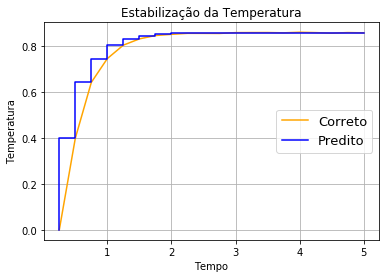

In [36]:
T = 0.25
aux = 0
Amostragem = []
for i in range(len(Y)):
    aux += T
    Amostragem.append(aux)


plt.plot(Amostragem,Y,color='orange',label='Correto')
plt.step(Amostragem,X@(o.T),color='blue',label='Predito')
plt.title('Estabilização da Temperatura') 
plt.legend(loc='center right',fontsize=13)
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.grid(True)
plt.show()